# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# importing dataset

In [2]:
data_set=pd.read_csv("FuelConsumption.csv")
data_set.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


 our traget for prediction would be CO2EMISSIONS

# some informations about dataset

In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


# dataset describe

In [4]:
data_set.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# finding correlation between features
we have to find the correlation between some features which we geuss they effect the target 

In [5]:
corr=data_set.corr()
corr["CO2EMISSIONS"].sort_values(ascending=False)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELCONSUMPTION_COMB_MPG   -0.906394
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64

as we see some of numberical variables have positive correlation with the target like FUELCONSUMPTION_CITY andFUELCONSUMPTION_COMB,..
and some of them have negative correlaiton with the target like FUELCONSUMPTION_COMB_MPG

# data visualization

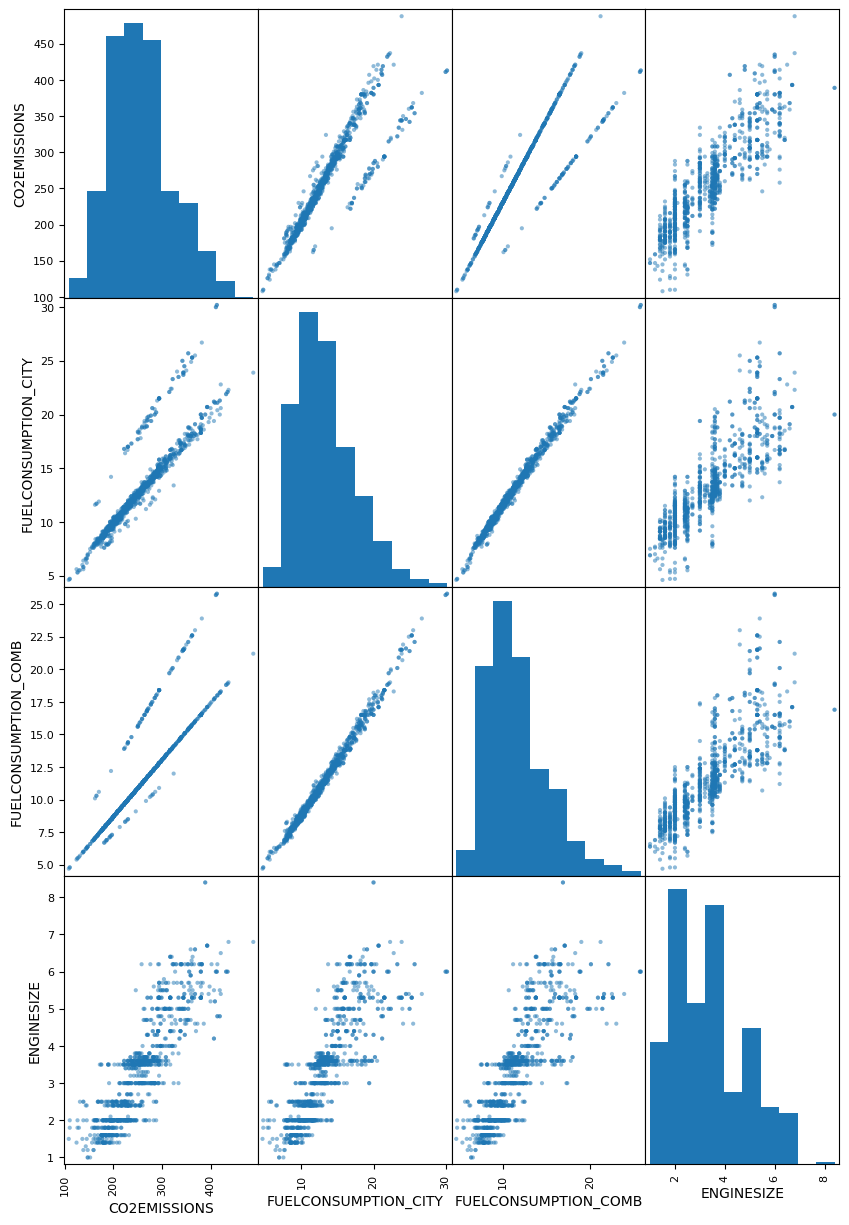

In [6]:
from pandas.plotting import scatter_matrix
features=["CO2EMISSIONS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB","ENGINESIZE"]
scatter_matrix(data_set[features],figsize=(10,15))
plt.show()

in the diagram we can see that we have linear relationship between CO2EMISSIONS and other features
so we know that we can use linear regression as our model.

In [7]:
dt=data_set[["ENGINESIZE","FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]].copy()
dt.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,8.5,196
1,2.4,11.2,9.6,221
2,1.5,6.0,5.9,136
3,3.5,12.7,11.1,255
4,3.5,12.1,10.6,244


# splitting dataset into train_set and test_set

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dt,test_size=0.3,random_state=5)
train_set.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
485,3.5,11.4,9.6,221
1046,2.5,11.4,9.8,225
406,2.0,11.9,10.6,170
919,3.6,12.9,11.3,260
663,2.5,11.8,10.4,239


# modeling

In [9]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
train_x=np.asanyarray(train_set[["FUELCONSUMPTION_CITY"]])
train_y=np.asanyarray(train_set[["CO2EMISSIONS"]])
reg.fit(train_x,train_y)
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[13.878355]]
Intercept:  [71.28812794]


# plotting linear regression

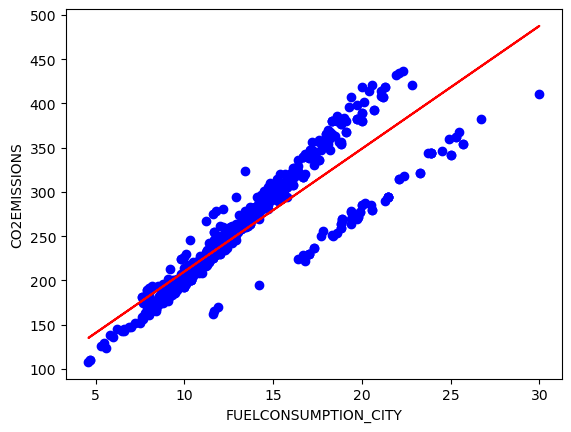

In [10]:
plt.scatter(train_set.FUELCONSUMPTION_CITY,train_set.CO2EMISSIONS,color="blue")
y=reg.coef_[0][0]*train_x+reg.intercept_[0]
plt.plot(train_x,y,color="red")
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show()

# prediction

In [15]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test_set[["FUELCONSUMPTION_CITY"]])
test_y=np.asanyarray(test_set[["CO2EMISSIONS"]])
pred=reg.predict(test_x)
print(f"R2-score : {r2_score(test_y,pred)}")

R2-score : 0.8205294273383902


R2-score shows us that how much well we have predicted. 
# as much as we were close to 1, we have predicted well 